In [1]:
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.layers import LSTM, Dense
import os,glob,pickle
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
filename=[]
labels=[]
def load_data():
    for file in glob.glob(r"D:\BTP\infant cry\donateacry_corpus_cleaned_and_updated_data\*"):
        label = os.path.basename(file)
        for audio in glob.glob(file+"\*.wav"):
#             print(audio)
            filename.append(audio)
            labels.append(label)
load_data()

In [3]:
# len(filename)
len(labels)

457

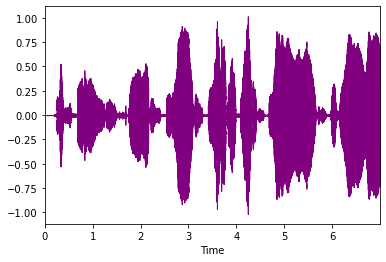

In [4]:

y,sr=librosa.load('discomfort.wav')
librosa.display.waveplot(y,sr=sr, x_axis='time', color='purple',offset=0.0)

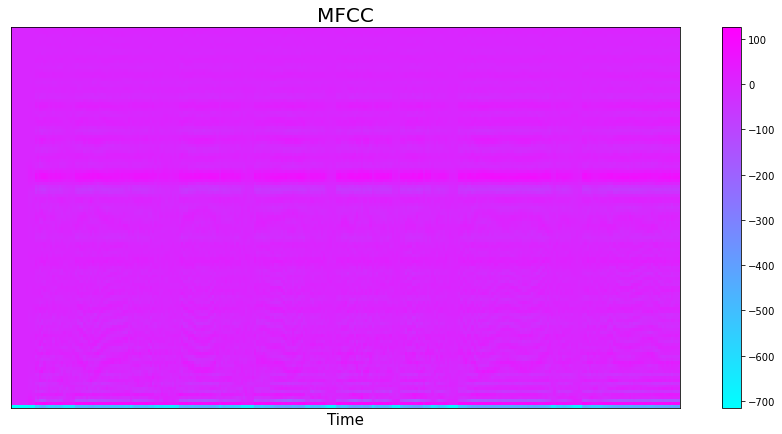

[[-7.1505151e+02 -7.1505151e+02 -7.1505151e+02 ... -4.1767773e+02
  -4.1129825e+02 -4.1737314e+02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.0637550e+02
   1.0738959e+02  1.0907994e+02]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.5840399e+02
  -1.6061247e+02 -1.5304260e+02]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.0666838e+00
  -5.1403999e-01 -2.0140705e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  5.0620804e+00
   4.9036560e+00  3.9292831e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  4.7868767e+00
   4.4234734e+00  6.3565941e+00]]
(128, 302)
[array([[-7.1505151e+02, -7.1505151e+02, -7.1505151e+02, ...,
        -4.1767773e+02, -4.1129825e+02, -4.1737314e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
         1.0637550e+02,  1.0738959e+02,  1.0907994e+02],
       [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        -1.5840399e+02, -1.6061247e+02, -1.5304260e+02],
       ...,
       [ 0.0000000e+00

In [5]:
hop_length = 512 #the default spacing between frames
n_fft = 255 #number of samples 
#cut the sample to the relevant times
y_cut=y
MFCCs = librosa.feature.mfcc(y_cut, n_fft=n_fft,hop_length=hop_length,n_mfcc=128)
datas = np.array((librosa.feature.mfcc(y, n_fft=n_fft,hop_length=hop_length,n_mfcc=128),2,400))
fig, ax = plt.subplots(figsize=(15,7))
librosa.display.specshow(MFCCs,sr=sr, cmap='cool',hop_length=hop_length)
ax.set_xlabel('Time', fontsize=15)
ax.set_title('MFCC', size=20)
plt.colorbar()
plt.show()
print(MFCCs)
print(MFCCs.shape)
print(datas)
print('\n')
print(datas[0].shape)

In [6]:
def get_features(filename,rlabels):
    features=[] #list to save features
    labels=[] #list to save labels
    i=0
    for index in range(0,len(filename)):
        #get the filename        
        audio=filename[i] 
          #save labels
        label = rlabels[i] 
        #load the file        
        y, sr = librosa.load(audio)
        mfccs = np.array(librosa.feature.mfcc(y,n_fft=n_fft,hop_length=hop_length,n_mfcc=128))
        ar=np.resize(mfccs,(128,280))
        features.append(ar)
        labels.append(label)
        i+=1
    print(i)
    return(features, labels)
X,y=get_features(filename,labels)

457


In [7]:
y=np.array(y)
print(y.shape)

(457,)


In [8]:
length=len(X)
X=np.array(X).reshape(length,128,280)
print(X.shape)

(457, 128, 280)


In [9]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))
y.shape

(457, 5)

In [10]:
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(len(X_train),len(y_train),len(X_test),len(y_test))

365 365 92 92


In [11]:
X_train.shape, X_test.shape, len(y_train), len(y_test)

((365, 128, 280), (92, 128, 280), 365, 92)

In [28]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow import keras as keras
from sklearn import metrics

input_shape=(128,280)
model = keras.Sequential()
model.add(LSTM(128,input_shape=input_shape))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128)               209408    
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               66048     
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_22 (Dense)             (None, 64)               

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [30]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test), shuffle=False)


Epoch 1/15
12/12 [==============================] - 8s 282ms/step - loss: 0.5472 - acc: 0.6334 - val_loss: 0.2174 - val_acc: 0.8587
Epoch 2/15
12/12 [==============================] - 2s 182ms/step - loss: 0.3555 - acc: 0.7487 - val_loss: 0.2176 - val_acc: 0.8587
Epoch 3/15
12/12 [==============================] - 2s 184ms/step - loss: 0.2733 - acc: 0.8049 - val_loss: 0.1992 - val_acc: 0.8587
Epoch 4/15
12/12 [==============================] - 2s 191ms/step - loss: 0.2723 - acc: 0.8028 - val_loss: 0.2029 - val_acc: 0.8587
Epoch 5/15
12/12 [==============================] - 2s 200ms/step - loss: 0.2485 - acc: 0.8002 - val_loss: 0.2094 - val_acc: 0.8587
Epoch 6/15
12/12 [==============================] - 2s 169ms/step - loss: 0.2155 - acc: 0.8070 - val_loss: 0.2303 - val_acc: 0.8587
Epoch 7/15
12/12 [==============================] - 2s 171ms/step - loss: 0.1692 - acc: 0.8109 - val_loss: 0.2658 - val_acc: 0.8587
Epoch 8/15
12/12 [==============================] - 2s 162ms/step - loss: 0.

In [31]:
loss, accuracy= model.evaluate(X_test, y_test, verbose=0)
print("loss: ",loss)
print("accuracy: ",accuracy)


loss:  0.3900173306465149
accuracy:  0.8260869383811951


In [32]:
y_pred = model.predict(X_test) 
y_pred = np.argmax(y_pred, axis = 1) 
label = np.argmax(y_test,axis = 1) 

from sklearn.metrics import confusion_matrix
print(confusion_matrix(label,y_pred))

[[ 0  0  1  4  0]
 [ 0  0  0  1  0]
 [ 0  0  0  1  0]
 [ 0  0  2 76  1]
 [ 0  0  0  6  0]]


In [33]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score
print(classification_report(y_true=label,y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.86      0.96      0.91        79
           4       0.00      0.00      0.00         6

    accuracy                           0.83        92
   macro avg       0.17      0.19      0.18        92
weighted avg       0.74      0.83      0.78        92



In [18]:
f1_score_per_class_validation = f1_score(y_true=label,y_pred=y_pred,average=None) 
print("The f1-score per class: ",f1_score_per_class_validation)
print("The f1-score : ",f1_score(y_true=label,y_pred=y_pred,average='weighted'))

The f1-score per class:  [0.        0.        0.        0.8969697 0.       ]
The f1-score :  0.7702239789196312
